In [18]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import pylab

In [192]:
training = x[:576]
test = x[576:]
len(training)


a = [5,10,12,15,17]
print(a[3:])


[15, 17]


In [2]:
x=np.genfromtxt('A5_q5.dat',dtype="double",delimiter=",")

In [164]:
def plot_data(r,s,y_pred,test,y_label):
    
    plot_x = []
    for i in range(r,r+s):
        plot_x.append(i)
        
    plt.plot(plot_x,test,label="original")
    plt.plot(plot_x,y_pred,label=y_label)
    plt.xlabel('Time')
    plt.ylabel('Average request Rate')
    pylab.legend(loc='upper left')   
    plt.show()

In [168]:
def EWMA(alpha):
    
    training = x[:576]
    test = x[576:]
    
    r= len(training)
    s = len(test)
    
    error = []
    y = []
    for i in range(r,r+s):
        base = 0
        j = i-1
        k = 0
        while(j >= 0):
            base = base+ (x[j]*((1-alpha)**k))
            j = j-1 
            k = k+1

        y_pred = alpha*base
        y.append(y_pred)
        
        error.append((abs(y_pred-x[i])/x[i])*100)
        
    plot_data(r,s,y,test,"EWMA("+str(alpha)+")")
    
    return sum(error)/len(error)

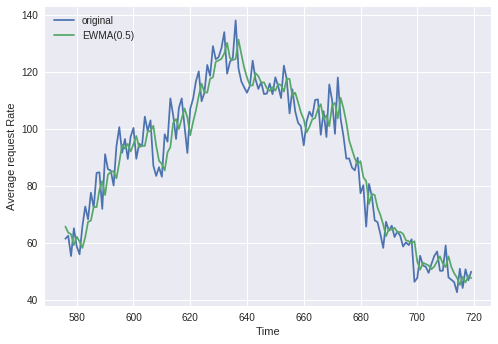

6.73759443495


In [170]:
error = EWMA(0.5)
print(error)

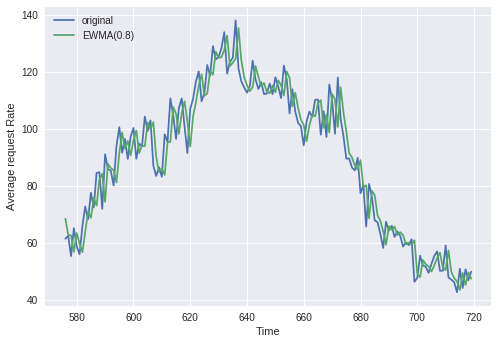

6.92667125341


In [171]:
error = EWMA(0.8)
print(error)

In [174]:
def Seasonal(S):
    
    training = x[:576]
    test = x[576:]
    
    r= len(training)
    s = len(test)
    
    error = []
    y = []
    for i in range(r,r+s):
      
        y_pred = x[i-S]
        y.append(y_pred)

        error.append((abs(y_pred-x[i])/x[i])*100)
        
    plot_data(r,s,y,test,"Seasonal("+str(S)+")")
    
    return sum(error)/len(error)

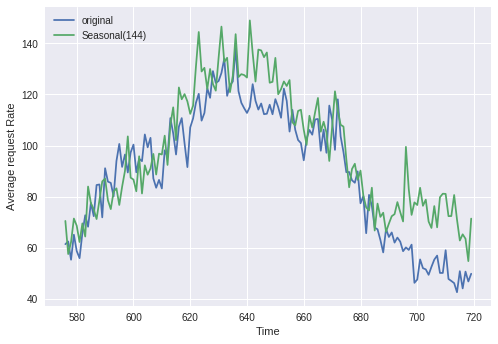

16.0782035018


In [175]:
error = Seasonal(144)
print(error)

In [248]:
def train_lr(p,length):
    #print("jhjd")
    training = []
    label = []
    
    for i in range(length):
        if(i+p < length):
            #print("ghttt")
            training.append([1])
            training[i] = training[i]+list(x[i:i+p])
            #training.append(x[i:i+144])
            label.append(x[i+p])

        else:
            break
            
    #print(len(label))
    beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(training),training)),np.matmul(np.transpose(training),label))
    
    return beta

In [263]:
def AR(p):
    
    training = x[:576]
    test = x[576:]
    
    r= len(training)
    s = len(test)
    
    error = []
    y = []
    for i in range(r,r+s):
        
        #print(i)
        testx = [1]
        temp = x[i-p:i]
        testx = testx + list(temp)
        #print("ggg")
        beta = train_lr(p,i)
        y_pred=np.matmul(testx,beta)
        y.append(y_pred)
        
        error.append((abs(y_pred-x[i])/x[i])*100)
        
    plot_data(r,s,y,test,"AR("+str(p)+")")
    
    return sum(error)/len(error)

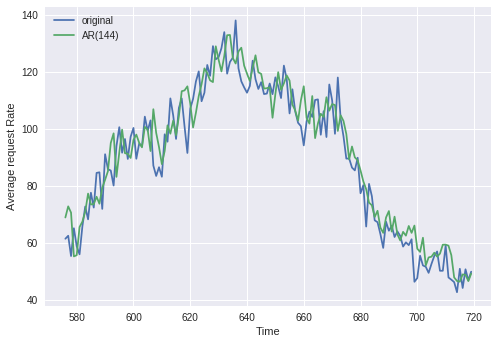

7.5326783363987504

In [264]:

p = 144

AR(p)